<img style="float: left;" src="datas/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2023 Automne</center>

<center>December 1st, 2023</center>

---

# <center><ins>TP Class N°5 - Geometric Transformations</ins></center>

#### *Instructions :*  

* This TP should be completed and uploaded on Moodle before **Thursday 7 December 2023, 23h59**.
* The name of the file you upload should be **TP5_name_surname.ipynb**.
* If you need to include attached files to you TP, please archive them together in a folder named **TP5_name_surname.zip**.

**General Advice:**

*When doing image processing and performing operations on pixels, it is a good practice to use float values for pixels with intensity [0,1].
Performing operations on uint8 encoded images can result in integer overflow and thus compute unpredictable values.*

## Exercise 1 : Image rotations

*(2 points)*

Import the RGB image : "mushroom.jpg".

(a) Using the geometric function *rotate* in the package *skimage.transform*, apply a $30°$ anticlockwise rotation to the image and a $100°$ clockwise rotation. Visualize all three images side-by-side.

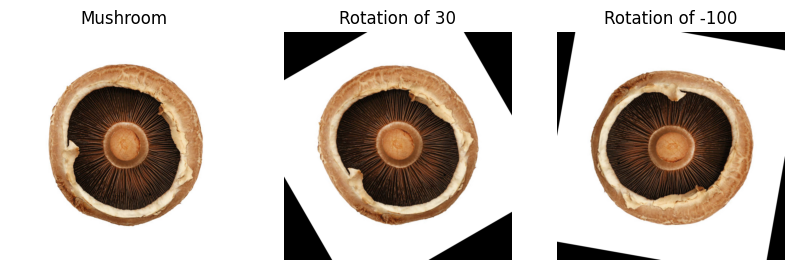

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

def open_image(source: str) -> np.ndarray:
    return sk.img_as_float32(plt.imread(source)) 

def print_image(image: np.ndarray, title: str = "Image", cmap='viridis'):
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

def print_image_subplot(image: np.ndarray, title: str = "Image", cmap='viridis'):
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')

def MSE(img_1: np.ndarray, img_2: np.ndarray):
    return np.mean((sk.img_as_float32(img_1) - sk.img_as_float32(img_2))**2)

mushroom = open_image('./datas/mushroom.jpg')
rotate_1 = sk.transform.rotate(mushroom, 30)
rotate_2 = sk.transform.rotate(mushroom, -100)
plt.figure(figsize=(10, 10))
plt.subplot(131)
print_image_subplot(mushroom, "Mushroom")
plt.subplot(132)
print_image_subplot(rotate_1, "Rotation of 30")
plt.subplot(133)
print_image_subplot(rotate_2, "Rotation of -100")
plt.show()

(b) Explain the meaning of the parameters 'center' and 'resize' of the function. Comment the effects on the border. Explain it on your images.

(c) Starting with the original image :

* Apply a rotation of 10 ° to the image and repeat this operation 36 times (this will perform a full 360 ° rotation). Try different parameters ’order’ (=0,1,2,3). Visualize the original image and the results side-by-side.

* Compute MSE between the original image and the various results you obtained. **Hint :** Pay attention to the pixels you apply your MSE measure to, you may want to use a mask.

* What is the effect of the parameter 'order' ? How does it work ?

> think about last tp !!!

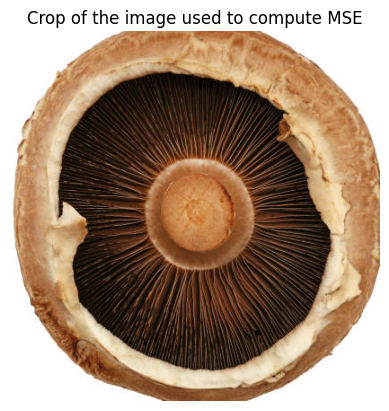

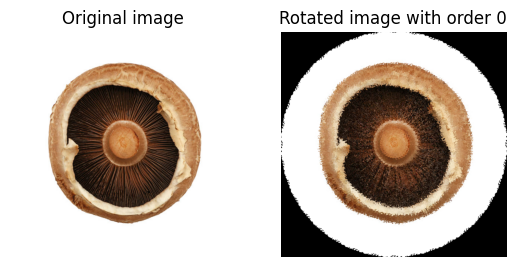

MSE between original and rotated image:
0.010424914


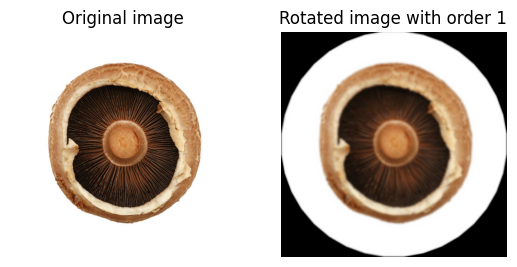

MSE between original and rotated image:
0.004397769


/home/darcy/.local/lib/python3.11/site-packages/skimage/transform/_warps.py:405: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  return warp(image, tform, output_shape=output_shape, order=order,


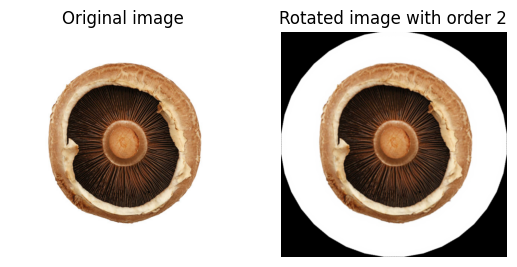

MSE between original and rotated image:
0.0012261998


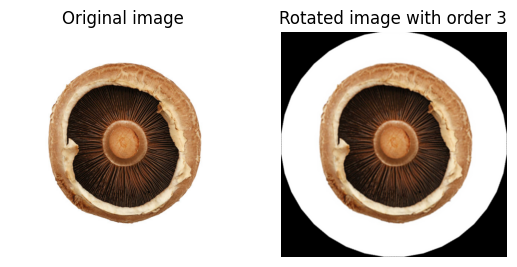

MSE between original and rotated image:
0.0017847965


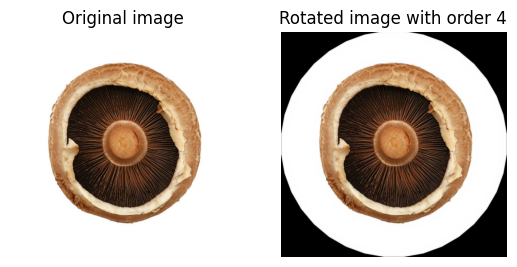

MSE between original and rotated image:
0.0006179713


In [25]:
def img_rotate_36(image: np.ndarray, order: int) -> np.ndarray:
    for i in range(36):
        image = sk.transform.rotate(image, 10, order=order)
    return image


print_image(mushroom[100:-100, 100: -100], "Crop of the image used to compute MSE")
for i in range(5):
    plt.figure()
    plt.subplot(121)
    print_image_subplot(mushroom, "Original image")
    plt.subplot(122)
    rotate_img = img_rotate_36(mushroom, i)
    print_image_subplot(rotate_img, f"Rotated image with order {i}")
    plt.show()
    print("MSE between original and rotated image:")
    print(MSE(mushroom[100:-100,100:-100], rotate_img[100:-100,100:-100]))

## Exercise 2 : QR code reading
*(2 points)*

In this exercise, you will implement a simple QR code reader based on the image *QR_code_persp.jpg*

(a) Start by loading the image and convert it to grayscale. Visualize it. Locate the four corners of the QR code in pixel coordinates.

(1050, 1400)


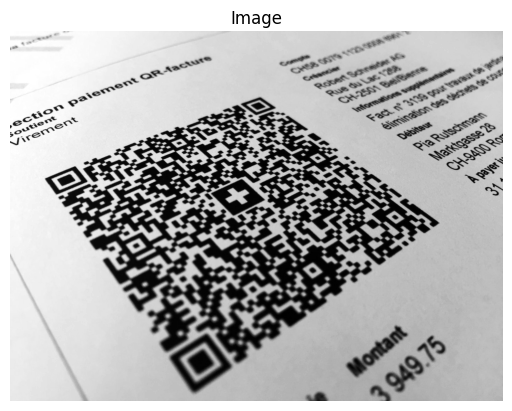

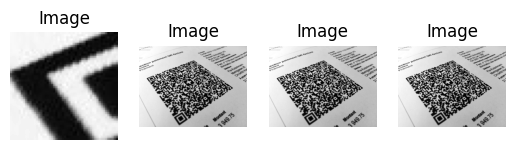

In [36]:
qr_code = open_image('./datas/QR_code_persp.jpg')

qr_code = sk.color.rgb2gray(qr_code)
print(qr_code.shape)
print_image(qr_code, cmap='gray')
plt.figure()
plt.subplot(141)
print_image_subplot(qr_code[400:450, 100:150], cmap='gray')
plt.subplot(142)
print_image_subplot(qr_code, cmap='gray')
plt.subplot(143)
print_image_subplot(qr_code, cmap='gray')
plt.subplot(144)
print_image_subplot(qr_code, cmap='gray')
plt.show()

(b) You now want to apply a projective transform to your QR code to have it squared and well-aligned.
To do this, you will use the class *ProjectiveTransform()* in the package *skimage.transform* (see an example [here](https://scikit-image.org/docs/dev/auto_examples/transform/plot_geometric.html#sphx-glr-auto-examples-transform-plot-geometric-py)).

* Use the method *estimate()* with a source shape $[[0, 0], [0, 610], [610, 610], [610, 0]]$
* Visualize the projective matrix which is stored in the params attribute of your ProjectiveTransform() object.
* Explain the meaning of the coefficients of this matrix.

(c) Apply the projective transform to your image

* Use the function *warp()* from *skimage.transform* with you ProjectiveTransform object as argument.
* Visualize the transformed image.

(d) What further steps would you consider in order to program a QR code reader ?

-- your answer --

## Exercise 3 : Nearest interpolation
*(2 points)*

In this exercise, you will write a program that performs rescaling of images using nearest interpolation.

(a) Load the image 'lena.png' and convert it to grayscale. Perform a downsampling, taking one pixel every 3 horizontally and vertically.

(b) Write a function that performs resizing using the nearest interpolation and apply it to the downsampled image.

In [63]:
def resize_ni(img, output_shape):
    """
    Changes the shape of the input image to match the output_shape

    Parameters
    ----------
    img : numpy array
        The input grayscale image

    output_shape : numpy array
        A couple of integers (x,y) giving the shape of the output image.

    Outputs
    ------
    resized : numpy array
        The image after the resizing algorithm. It should have shape output_shape.
    """
    
    return resized

*Hint :* You may want to use *np.round()* to find the nearest-neighbouring point. Try not to use loops on pixels as this is veeeery slow.

(c) Apply the function *resize()* from *skimage.transform* with parameter 'order'=0. Visualize all three images (original, resize_ni and resize) side-by-side. Compute MSE between the original and the upscaled images. Comment your results.